# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [37]:
#importando pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [38]:
#carregando a base
previsao = pd.read_csv('previsao_de_renda.csv')
previsao.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [39]:
previsao.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [40]:
previsao.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [41]:
previsao_quant = previsao[['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']]
previsao_quant

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29
14996,1,30,12.079452,3.0,2519.18
14997,0,40,2.161644,2.0,1586.85
14998,0,47,3.295890,2.0,6975.39


In [42]:
previsao_quant.isna().sum()

qtd_filhos                  0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [43]:
previsao_quant = previsao_quant.dropna()
previsao_quant

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29
14996,1,30,12.079452,3.0,2519.18
14997,0,40,2.161644,2.0,1586.85
14998,0,47,3.295890,2.0,6975.39


In [44]:
previsao_quant.reset_index()

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,1,36,3.575342,3.0,3369.24
1,1,0,42,0.860274,2.0,6096.14
2,2,2,31,8.065753,4.0,5658.98
3,3,0,50,1.208219,2.0,7246.69
4,4,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...
12461,14995,1,37,2.046575,3.0,1193.29
12462,14996,1,30,12.079452,3.0,2519.18
12463,14997,0,40,2.161644,2.0,1586.85
12464,14998,0,47,3.295890,2.0,6975.39


In [45]:
previsao_quant.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.289012,-0.074250,0.908703,-0.016189
idade,-0.289012,1.000000,0.323934,-0.257281,0.151364
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.908703,-0.257281,-0.065748,1.000000,-0.004865
renda,-0.016189,0.151364,0.394235,-0.004865,1.000000


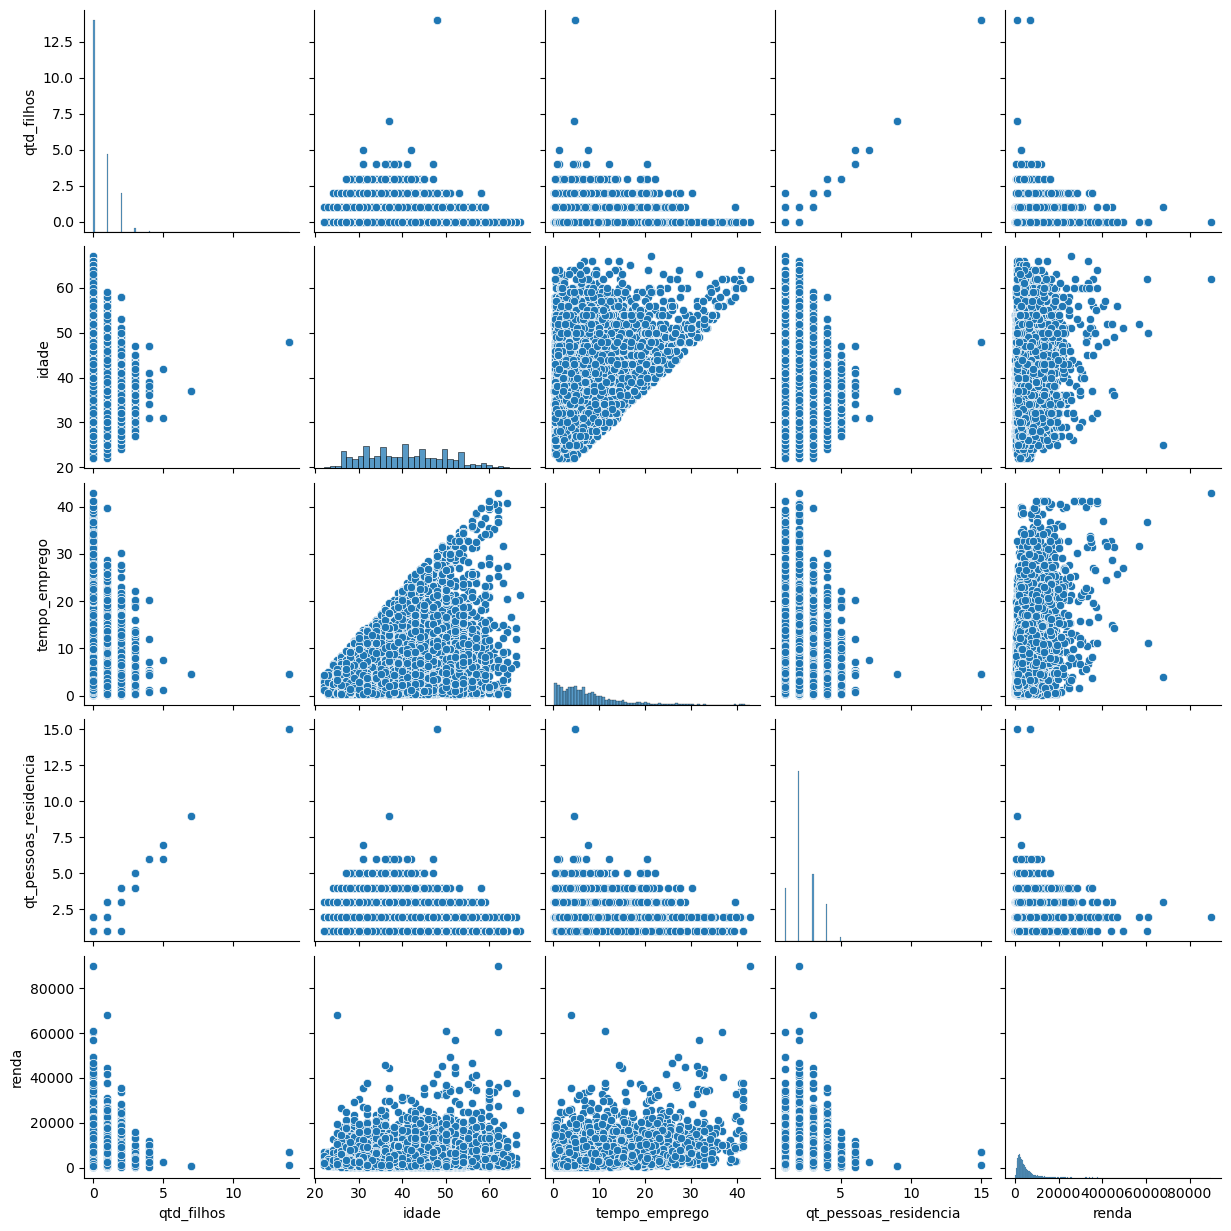

In [46]:
sns.pairplot(previsao_quant)

na análise do pairplot conseguimos perceber uma correlação entre a quantidade de filhos e pessoas na residência o que é óbvio. Porém quando analisamos a renda com as outras varáveis anaisando o coor vemos uma relação entre renda e tempo de emprego que não é acompanhada pelo gráfico dessas duas variáveis.

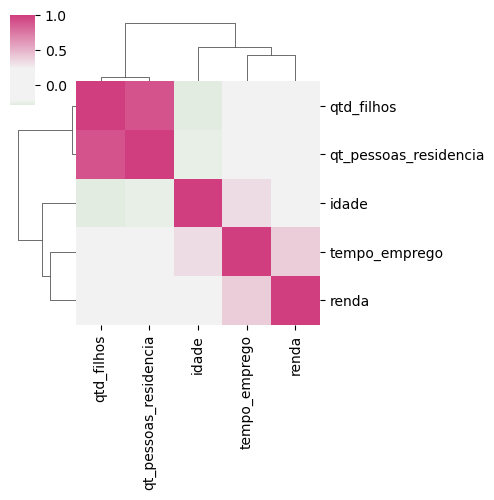

In [47]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(previsao_quant.corr(), figsize=(5, 5), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='idade', ylabel='tempo_emprego'>

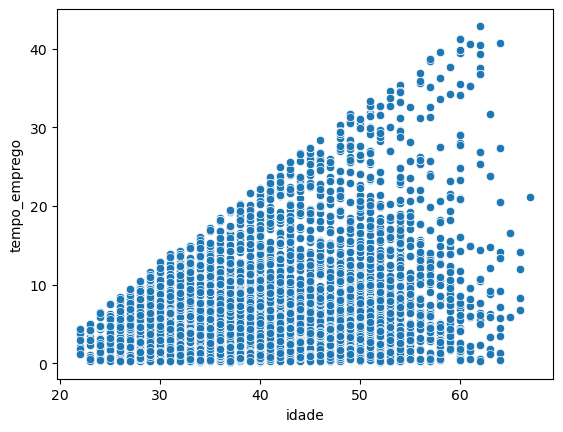

In [49]:
sns.scatterplot(x = 'idade'
                , y = 'tempo_emprego'
                , data = previsao_quant
                
               )

com essas duas variáveis observamos que quanto maior a idade valores maiores para tempo de emprego. O que é esperado, pois uma pessoa com mais idade possuem chances maiores de ter um maior tempo de trabalho.

3) Na su aopinião, há outliers na variável renda?

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

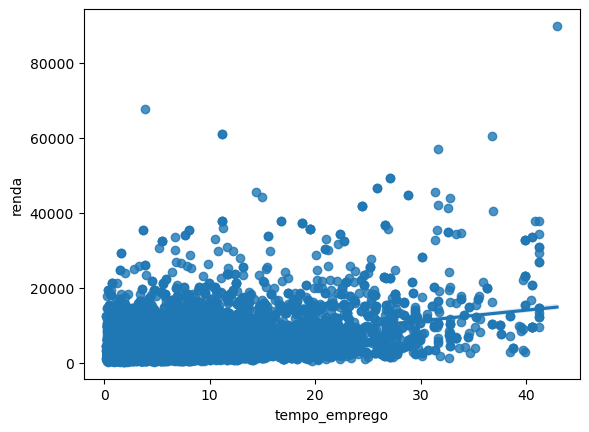

In [50]:
 sns.regplot(x='tempo_emprego', y='renda', data = previsao_quant)

como pode-se observar há muitos pontos que destoam significativamente do conjunto.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [59]:
previsao_renda = previsao_quant[['tempo_emprego','renda']]
previsao_renda

,tempo_emprego,renda
0,3.575342,3369.24
1,0.860274,6096.14
2,8.065753,5658.98
3,1.208219,7246.69
4,13.873973,4017.37
...,...,...
14995,2.046575,1193.29
14996,12.079452,2519.18
14997,2.161644,1586.85
14998,3.295890,6975.39


C:\Users\Samsung\AppData\Local\Temp\ipykernel_26044\2198263836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previsao_renda['log_y'] = np.log(previsao_renda['renda'])


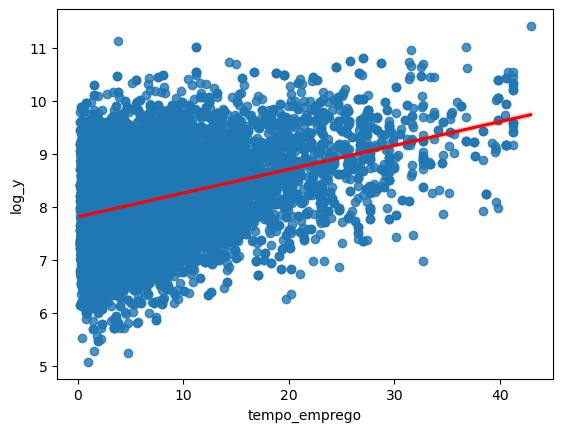

In [61]:
previsao_renda['log_y'] = np.log(previsao_renda['renda'])

_ = sns.regplot(x='tempo_emprego', y='log_y', data = previsao_renda,line_kws = {'color': 'red'})

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
Melhorou uma vez que vemos a bivariada acompnhando melhor a reta.